In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/text analytics/nlp assignment/TXTA_Data.zip"

In [ ]:
import re, shutil,os

In [ ]:
topics=os.listdir("/content/news_article_data")

In [ ]:
topics

['politics', 'business', 'tech', 'sport', 'entertainment']

In [ ]:
dataset=[]

In [ ]:
for i in topics:
  main_topic=f"/content/news_article_data/{i}"
  files=os.listdir(main_topic)
  for j in files:
    try:
      with open(f"{main_topic}/{j}","r") as f:
        lines=f.readlines()
        data=" ".join(lines)
        dataset.append((data,i))
    except:
      pass

In [ ]:
len(dataset)

2224

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(dataset,columns=["news","category"])

In [ ]:
df.head(10)

,news,category
0,Will Tory tax cuts lift spirits?\n \n Michael ...,politics
1,"Lord Scarman, 93, dies peacefully\n \n Disting...",politics
2,Muslims discuss election concerns\n \n Issues ...,politics
3,Blair defends terror law changes\n \n The prim...,politics
4,New foot and mouth action urged\n \n A senior ...,politics
5,Hunt ban support is 'in decline'\n \n Support ...,politics
6,E-University 'disgraceful waste'\n \n A failed...,politics
7,Labour MPs' fears over squabbling\n \n If ther...,politics
8,Escaped prisoner report ordered\n \n First Min...,politics
9,Lib Dems 'to target stamp duty'\n \n The Liber...,politics


In [ ]:
df.tail(10)

,news,category
2214,Fockers retain film chart crown\n \n Comedy Me...,entertainment
2215,'Comeback' show for Friends star\n \n Friends ...,entertainment
2216,Spark heads world Booker list\n \n Dame Muriel...,entertainment
2217,Sundance to honour foreign films\n \n Internat...,entertainment
2218,Neeson in bid to revive theatre\n \n Hollywood...,entertainment
2219,Stars gear up for Bafta ceremony\n \n Film sta...,entertainment
2220,Disputed Nirvana box set on sale\n \n A box se...,entertainment
2221,Carry On star Patsy Rowlands dies\n \n Actress...,entertainment
2222,Fockers fuel festive film chart\n \n Comedy Me...,entertainment
2223,De Niro film leads US box office\n \n Film sta...,entertainment


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(8,8)
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

 Find the top 5 most mentioned business entities with their count figures

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy
nlp=spacy.load('en_core_web_lg')

In [ ]:
business=df[df.category=='business']

In [ ]:
business.shape

(510, 2)

In [ ]:
entity=[]

In [ ]:
for i in business.news:
  t=nlp(i)
  orgs=[ent for ent in t.ents if ent.label_=="ORG"]
  f=" ".join(str(o) for o in orgs)  
  entity.append(f)

In [ ]:
len(entity)

510

In [ ]:
entity=" ".join(str(o) for o in entity)

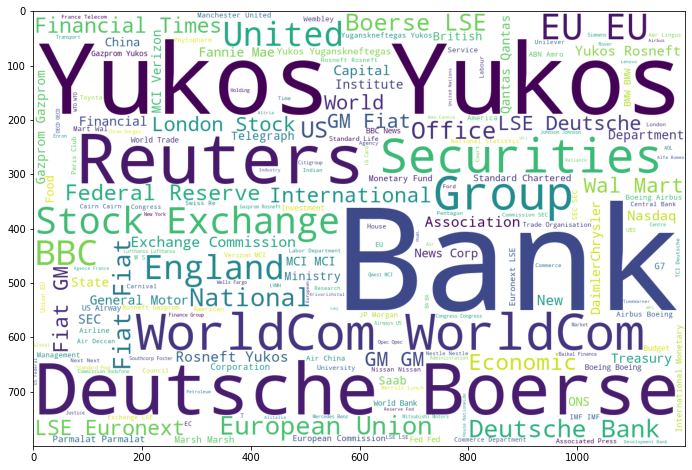

In [ ]:
wc=WordCloud(width=1200,height=800,stopwords=STOPWORDS,background_color="white")
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(entity))
plt.show()

In [ ]:
text_dictionary = wc.process_text(entity)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wc.words_

#print results
print(list(word_freq.items())[:20])

[('Bank', 136), ('Yukos Yukos', 81), ('Deutsche Boerse', 64), ('Reuters', 59), ('WorldCom WorldCom', 45), ('Securities', 40), ('Group', 39), ('Stock Exchange', 39), ('EU EU', 38), ('BBC', 35), ('England', 33), ('United', 33), ('European Union', 29), ('National', 28), ('Deutsche Bank', 28), ('Fiat Fiat', 28), ('Office', 27), ('Boerse LSE', 26), ('US', 25), ('Economic', 24)]


Build a classification model to classify the news categories. (balanced accuracy should be above 65%) 

In [ ]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import cohen_kappa_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC 

In [ ]:
def model_TFIDF(df):
  X=df.news
  y=df.category 
  x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=123456)
  vectorizer=TfidfVectorizer(stop_words=STOPWORDS,use_idf=True,ngram_range=(1,2))
  vectorizer.fit(x_train)
  x_train=vectorizer.transform(x_train)
  x_val=vectorizer.transform(x_val)
  print(x_train.shape)
  print(x_val.shape) 
  
  def model(model):
    model.fit(X=x_train,y=y_train)
    pred_val=model.predict(x_val)
    acc=accuracy_score(pred_val,y_val)
    cohen=cohen_kappa_score(pred_val,y_val)
    return (acc,cohen) 
  lr=LogisticRegression()
  x=model(lr)
  print(f"Accuracy for Logistic Regression is {x[0]}")
  print(f"Cohen Kappa Score for Logistic Regression is {x[1]}")
  tree=DecisionTreeClassifier()
  x=model(tree)
  print(f"Accuracy for Decision Tree is {x[0]}")
  print(f"Cohen Kappa Score for Decision Tree is {x[1]}")
  sv=SVC()
  x=model(sv) 
  print(f"Accuracy for Suppoert Vector Machine is {x[0]}")
  print(f"Cohen Kappa Score for Suppoert Vector Machine is {x[1]}")

In [ ]:
model_TFIDF(df)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(1556, 278687)
(668, 278687)
Accuracy for Logistic Regression is 0.9760479041916168
Cohen Kappa Score for Logistic Regression is 0.9698844744998592
Accuracy for Decision Tree is 0.7949101796407185
Cohen Kappa Score for Decision Tree is 0.7422549174233377
Accuracy for Suppoert Vector Machine is 0.9745508982035929
Cohen Kappa Score for Suppoert Vector Machine is 0.9679846633117661


In [ ]:
def model_SVD(df):
  X=df.news
  y=df.category
  x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=123456)
  vectorizer=TfidfVectorizer(stop_words=STOPWORDS,use_idf=True,ngram_range=(1,2))
  vectorizer.fit(x_train)
  x_train=vectorizer.transform(x_train)
  x_val=vectorizer.transform(x_val)
  SV=TruncatedSVD(n_components=150)
  SV.fit(x_train)
  x_train=SV.fit_transform(x_train)
  x_val=SV.transform(x_val)
  def model(model):
    model.fit(X=x_train,y=y_train)
    pred_val=model.predict(x_val)
    acc=accuracy_score(pred_val,y_val)
    cohen=cohen_kappa_score(pred_val,y_val)
    return (acc,cohen) 
  lr=LogisticRegression()
  x=model(lr)
  print(f"Accuracy for Logistic Regression is {x[0]}")
  print(f"Cohen Kappa Score for Logistic Regression is {x[1]}")
  tree=DecisionTreeClassifier()
  x=model(tree)
  print(f"Accuracy for Decision Tree is {x[0]}")
  print(f"Cohen Kappa Score for Decision Tree is {x[1]}")
  sv=SVC()
  x=model(sv) 
  print(f"Accuracy for Suppoert Vector Machine is {x[0]}")
  print(f"Cohen Kappa Score for Suppoert Vector Machine is {x[1]}")

In [ ]:
model_SVD(df)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


Accuracy for Logistic Regression is 0.9595808383233533
Cohen Kappa Score for Logistic Regression is 0.9491343303786723
Accuracy for Decision Tree is 0.9356287425149701
Cohen Kappa Score for Decision Tree is 0.9191183096053342
Accuracy for Suppoert Vector Machine is 0.9655688622754491
Cohen Kappa Score for Suppoert Vector Machine is 0.9566901388599167


 Find out top 10 word chunks which are similar to "Van Gogh"

In [ ]:
news=df.news

In [ ]:
news.shape

(2224,)

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
def similar_words(word):
  tfidf=TfidfVectorizer(stop_words=STOPWORDS,token_pattern="[a-z']+",ngram_range=(1,2))
  tfidf_mat_train=tfidf.fit_transform(news)
  svd_new=TruncatedSVD(n_components=150)
  word_vector=svd_new.fit_transform(tfidf_mat_train.T)
  #print(word_vector.shape)
  i=tfidf.vocabulary_[word]
  dist_van=pairwise_distances(X=word_vector,Y=word_vector[i,:].reshape(1,-1),metric="cosine")
  a=dist_van.flatten().argsort()
  id_to_word={v:k for k,v in tfidf.vocabulary_.items()}
  for i in a[0:20]:
    print(id_to_word[i])

In [ ]:
similar_words('van gogh')

gogh's
gogh
van gogh's
van gogh
theo van
january van
director theo
death threats
gogh shot
shot stabbed
theo
underexposure
film submission
dutch festival
rotterdam film
said festival
premiered
festival film
last feature
hamer said


In [ ]:
similar_words('eu')

eu
european union
member states
eu still
eu budget
new eu
jose manuel
netherlands sweden
want eu
states' combined
contributors eu
net contributors
eu commission's
budget capped
mean hike
austria netherlands
proposal mean
sweden want
member states'
less eu


Segregate the technical news in a meaningful way.

In [ ]:
tech=df[df.category=='tech']

In [ ]:
tech.shape

(401, 2)

In [ ]:
def LSA(df):
  news=df.news
  vectorizer=TfidfVectorizer(stop_words=STOPWORDS,use_idf=True,ngram_range=(1,1))
  X=vectorizer.fit_transform(news)
  print(X.shape)
  lsa=TruncatedSVD(n_components=150)
  lsa.fit(X)
  terms=vectorizer.get_feature_names()
  for i,comp in enumerate(lsa.components_):
    termsInComp=zip(terms,comp)
    sortedTerms=sorted(termsInComp,key=lambda x:x[1],reverse=True)[:10]
    for term in sortedTerms:
      print(term[0])
    print("*"*500)


In [ ]:
LSA(tech)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(401, 11966)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


said
will
mobile
people
music
games
phone
digital
broadband
tv
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
virus
spyware
security
software
microsoft
search
mail
anti
spam
users
******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [ ]:
!pip install ktrain

In [ ]:
import ktrain 

In [ ]:
def LDA(df):
  news=df.news
  tm=ktrain.text.get_topic_model(news,n_features=1000,n_topics=7)
  print("Printing Topics")
  tm.print_topics()
  print("*"*500)
  tm.build(news,threshold=0.1)
  print("Printing topics with counts")
  tm.print_topics(show_counts=True)
  print("*"*500)
  print("Vizualization")
  tm.visualize_documents(doc_topics=tm.get_doctopics())

In [ ]:
LDA(tech)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
Printing Topics
topic 0 | law spam software e-mails internet state european sending years messages
topic 1 | games dvd sony game dvds technology high-definition year format gaming
topic 2 | technology phone mobile software phones use users used networks using
topic 3 | music games digital video search online game mobile players broadband
topic 4 | site domain sites traffic net website users spam websites campaign
topic 5 | apple computer virus mac mini machine software e-mail windows used
topic 6 | light robot ink used silicon laser robots make intel data
***************************************************************************************************************************************************************************************************************************************************